In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#data importation
df  = pd.read_csv("HR-Employee-Attrition.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
#data analysis
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
#data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
#Showing a breakdown of distance from home by job role and attrition.
df.groupby(["DistanceFromHome", "JobRole"])["Attrition"].count()




DistanceFromHome  JobRole                  
1                 Healthcare Representative    23
                  Human Resources               9
                  Laboratory Technician        31
                  Manager                      13
                  Manufacturing Director       24
                                               ..
29                Manager                       4
                  Manufacturing Director        4
                  Research Scientist            4
                  Sales Executive               5
                  Sales Representative          1
Name: Attrition, Length: 224, dtype: int64

In [13]:
#Comparing average monthly income by education and attrition.
df.groupby(["MonthlyIncome", "Education"])["Attrition"].count()






MonthlyIncome  Education
1009           1            1
1051           2            1
1052           1            1
1081           3            1
1091           3            1
                           ..
19859          3            1
19926          3            1
19943          4            1
19973          1            1
19999          4            1
Name: Attrition, Length: 1431, dtype: int64

In [14]:
#getting average montly income income and creating column
av_Monthlyincome = df["MonthlyIncome"].mean()

df = pd.DataFrame(df)
df['av_Monthlyincome'] = av_Monthlyincome

df.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,av_Monthlyincome
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,6502.931293
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,6502.931293
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,6502.931293
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,6502.931293
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,6502.931293


In [15]:
# comparing the three columns
df_comparison = pd.DataFrame(df, columns = ['av_Monthlyincome','Education', 'Attrition'] )

df_comparison.head(10)


,av_Monthlyincome,Education,Attrition
0,6502.931293,2,Yes
1,6502.931293,1,No
2,6502.931293,2,Yes
3,6502.931293,4,No
4,6502.931293,1,No
5,6502.931293,2,No
6,6502.931293,3,No
7,6502.931293,1,No
8,6502.931293,3,No
9,6502.931293,3,No


In [ ]:
#ASSIGHNMENT 3
#Based on your analysis in Assignment 2, express your results in the
#form of the most appropriate visualization using any visualization library of your choice.

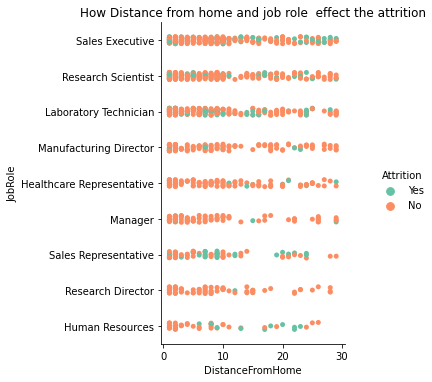

In [16]:
# visualisation on breakdown of distance from home by job role and attrition.

sns.catplot(x="DistanceFromHome",y="JobRole",hue="Attrition",data=df,palette="Set2")
plt.title("How Distance from home and job role  effect the attrition");




<AxesSubplot:xlabel='Education', ylabel='av_Monthlyincome'>

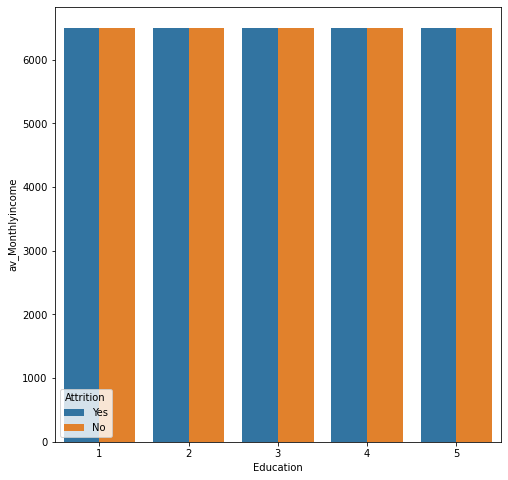

In [17]:
# visualisation of Comparing average monthly income by education and attrition

fig, ax = plt.subplots(figsize = (8,8))
sns.barplot(y = 'av_Monthlyincome',x = 'Education',hue = 'Attrition',data = df,ax = ax)
# this shows average montly income does not affect attrition 

<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

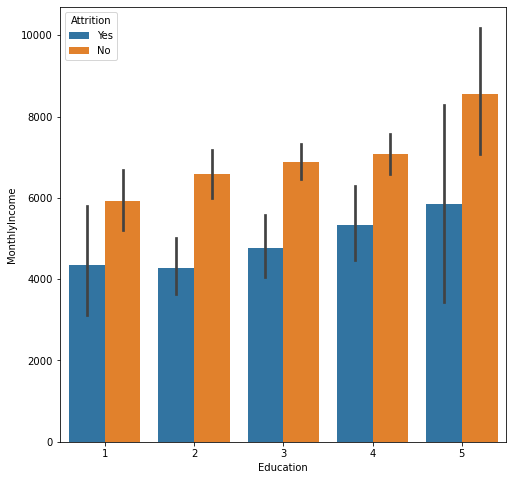

In [18]:
# plot for monthly income and education relating with attrition

fig, ax = plt.subplots(figsize = (8,8))
sns.barplot(y = 'MonthlyIncome',x = 'Education',hue = 'Attrition',data = df,ax = ax)

# therefore the higher the education the higher the chances for attrition